# Histogram Processing


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Intensity Transformations
We can apply different transformations over the pixel intensities in an image, for example:
### Image Negative

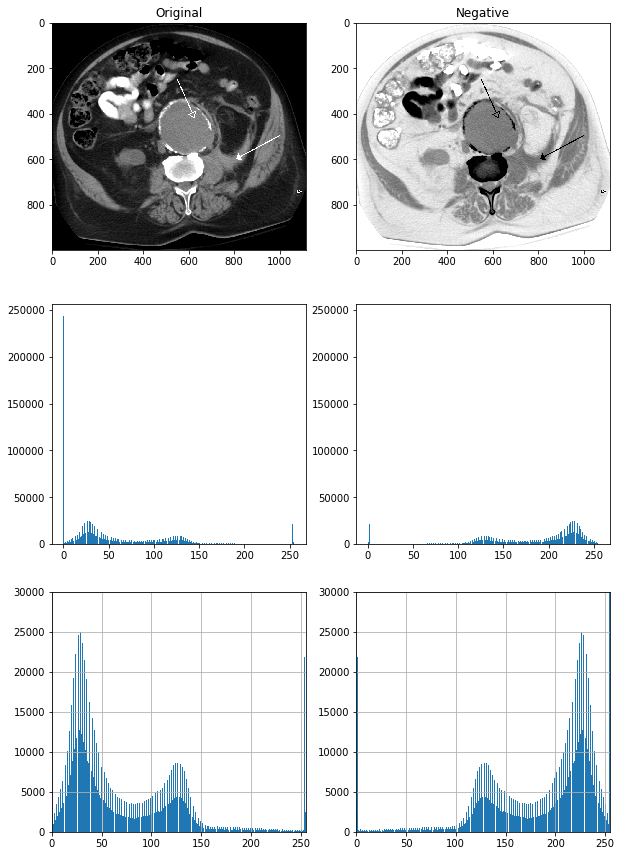

In [2]:
I = cv.imread('../imgs/rupturedAAA.png',0) # <==== Read as grayscale image
In = 255 - I

plt.figure(figsize=(10,15))
plt.subplot(321), plt.imshow(I,'gray'), plt.title('Original') 
plt.subplot(322), plt.imshow(In,'gray'), plt.title('Negative') 
plt.subplot(323), plt.hist(I.ravel(),256)
plt.subplot(324), plt.hist(In.ravel(),256)
plt.subplot(325), plt.hist(I.ravel(),256), plt.axis([0,255,0,30e3]), plt.grid(True) 
plt.subplot(326), plt.hist(In.ravel(),256), plt.axis([0,255,0,30e3]),plt.grid(True);

### Gamma Correction
With gamma < 1 we can obtain a brighter image:

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


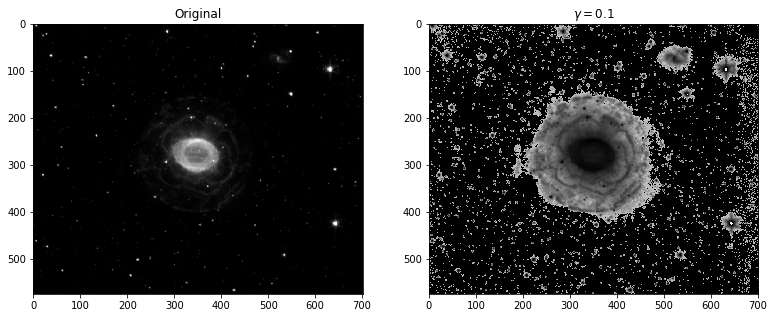

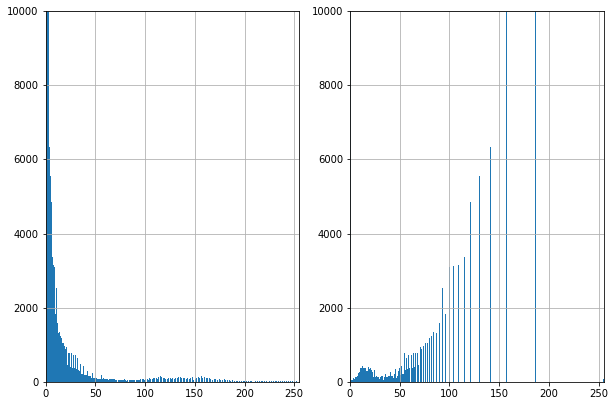

In [9]:
I = cv.imread('../imgs/space.png',0) 
g = -0.1
Ig = (255**(1-g))*(I.astype(np.float64)**g)
Ig = Ig.astype(np.uint8)

plt.figure(figsize=(13,18))
plt.subplot(221), plt.imshow(I,'gray'), plt.title('Original') 
plt.subplot(222), plt.imshow(Ig,'gray'), plt.title(r'$\gamma = 0.1$') 
plt.figure(figsize=(10,15))
plt.subplot(223), plt.hist(I.ravel(),256), plt.axis([0,255,0,10e3]), plt.grid(True) 
plt.subplot(224), plt.hist(Ig.ravel(),256), plt.axis([0,255,0,10e3]), plt.grid(True); 


With gamma > 1 we can obtain a darker image:

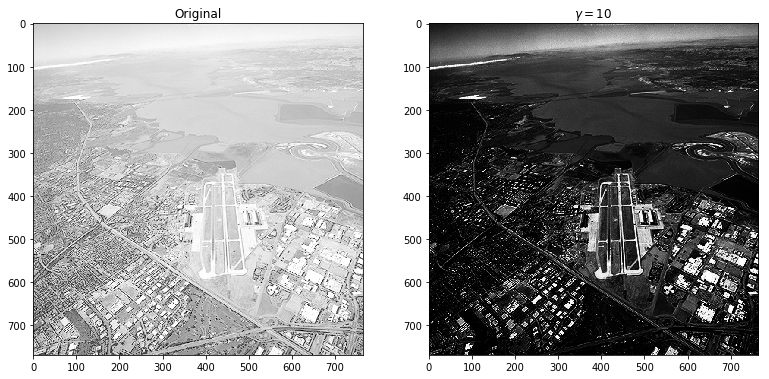

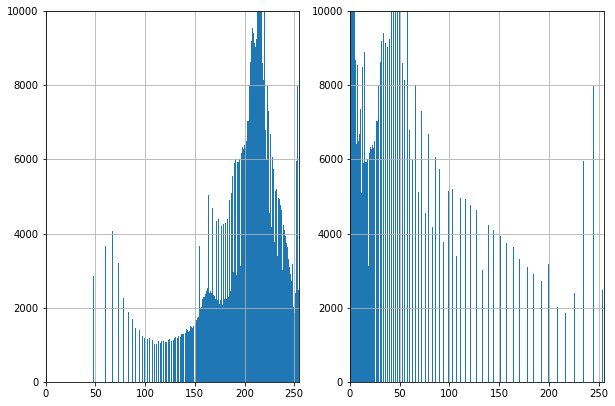

In [10]:
I = cv.imread('../imgs/aerial.tif',0) 
g = 
Ig = (255**(1-g))*(I.astype(np.float64)**g)
Ig = Ig.astype(np.uint8)

plt.figure(figsize=(13,18))
plt.subplot(221), plt.imshow(I,'gray'), plt.title('Original') 
plt.subplot(222), plt.imshow(Ig,'gray'), plt.title(r'$\gamma = 10$') 
plt.figure(figsize=(10,15))
plt.subplot(223), plt.hist(I.ravel(),256), plt.axis([0,255,0,10e3]), plt.grid(True) 
plt.subplot(224), plt.hist(Ig.ravel(),256), plt.axis([0,255,0,10e3]), plt.grid(True); 


## Contrast Stretching
Contrast stretching (often called normalization) is a simple image enhancement technique that attempts to improve the contrast in an image by 'stretching' the range of intensity values it contains to span a desired range of values, e.g. the the full range of pixel values that the image type concerned allows.

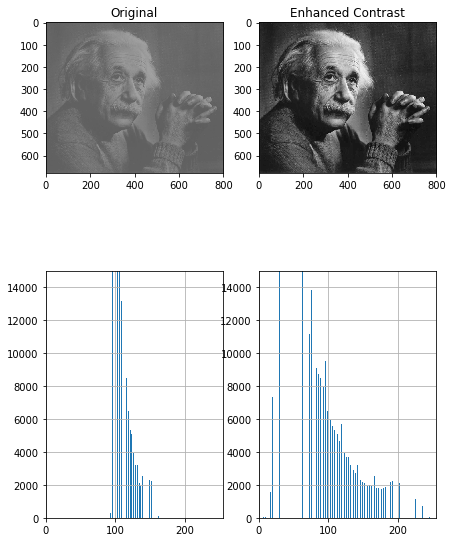

In [15]:
I = cv.imread('../imgs/einstein.tif',0) 
Imin = np.amin(I)
Imax = np.amax(I)
Is = (255/(Imax-Imin))*(I.astype(np.float64) - Imin)
#Is = Is.astype(np.uint8)

plt.figure(figsize=(7,10))
plt.subplot(221), plt.imshow(I,'gray',vmin=0, vmax=255), plt.title('Original') 
plt.subplot(222), plt.imshow(Is,'gray',vmin=0, vmax=255), plt.title('Enhanced Contrast') 
plt.subplot(223), plt.hist(I.ravel(),256), plt.axis([0,255,0,15e3]), plt.grid(True) 
plt.subplot(224), plt.hist(Is.ravel(),256), plt.axis([0,255,0,15e3]), plt.grid(True); 


## Histogram Equalization
Histogram equalization provides a sophisticated method for modifying the dynamic range and contrast of an image by altering that image such that its intensity histogram has a desired shape. Unlike contrast stretching, histogram modeling operators may employ non-linear functions to map between pixel intensity values in the input and output images.

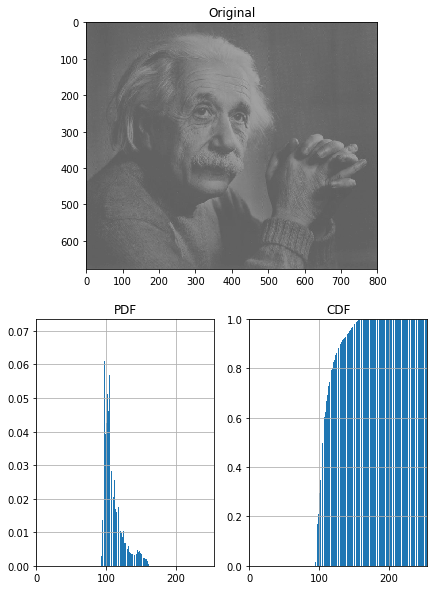

In [6]:
I = cv.imread('../imgs/einstein.tif',0)
h,b = np.histogram(I,bins=256,range=[0,256])
pdf =  h.astype(np.float64)/np.sum(h)
# CDF
cdf = np.zeros(256)
cdf[0] = pdf[0]
for i in range(256):
    cdf[i] = cdf[i-1] + pdf[i]



plt.figure(figsize=(7,10))
plt.subplot2grid((2, 2), (0, 0), colspan=2)
plt.imshow(I,'gray',vmin=0, vmax=255), plt.title('Original') 
plt.subplot2grid((2, 2), (1, 0)), plt.bar(range(256),pdf), plt.axis([0,255,0,4e4/np.sum(h)]), plt.grid(True), plt.title('PDF') 
plt.subplot2grid((2, 2), (1, 1)), plt.bar(range(256),cdf), plt.axis([0,255,0,1]), plt.grid(True), plt.title('CDF'); 

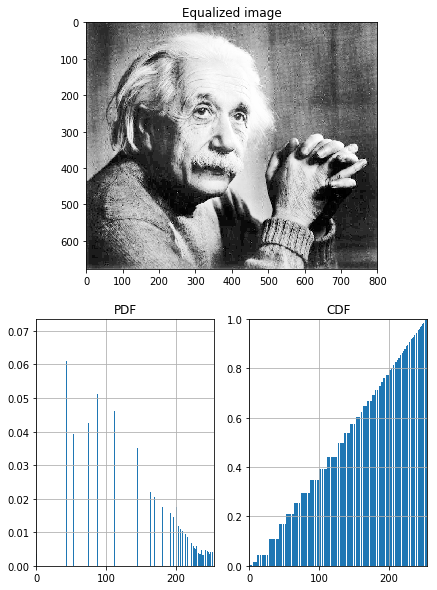

In [7]:
# Equalization
sz = I.shape
Ie = np.zeros(shape=sz)
for i in range(sz[0]):
    for j in range(sz[1]):
        Ie[i,j] = cdf[I[i,j]]

Ie = 255*Ie
Ie = Ie.astype(np.uint8)
        
he,be = np.histogram(Ie,bins=256,range=[0,256])
pdf_e = he.astype(np.float64)/np.sum(he)
# CDF 
cdf_e = np.zeros(256)
cdf_e[0] = pdf_e[0]
for i in range(256):
    cdf_e[i] =  cdf_e[i-1] + pdf_e[i]

plt.figure(figsize=(7,10))
plt.subplot2grid((2, 2), (0, 0), colspan=2)
plt.imshow(Ie,'gray',vmin=0, vmax=255), plt.title('Equalized image') 
plt.subplot2grid((2, 2), (1, 0)), plt.bar(range(256),pdf_e), plt.axis([0,255,0,4e4/np.sum(he)]), plt.grid(True), plt.title('PDF') 
plt.subplot2grid((2, 2), (1, 1)), plt.bar(range(256),cdf_e), plt.axis([0,255,0,1]), plt.grid(True), plt.title('CDF');  